In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
import subprocess
import sys

In [2]:
base_dir = os.getcwd()
exec_dir = '..'

In [3]:
sizes = [1000, 2500, 5000, 7500, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
print(sizes)

[1000, 2500, 5000, 7500, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]


# Construction test 1

First experiment: keep the page capacity constant and change the number of input records. Then measure how the construction time varies.

In [43]:
# Test the implementation.

capacity = 100
ntrials = 20
output_file1 = '{}/test_construction/test_construction.csv'.format(base_dir)

f = open(output_file1, 'w')

os.chdir(exec_dir)

for m in sizes:
    if (m == 0): 
        continue
    print('Testing m={}...'.format(m))
    input_file = "{}/test_construction/crash_data_{}.csv".format(base_dir, m)
    print('Input file: ' + input_file)
    avg = 0
    for i in range(0, ntrials):
        p = subprocess.run(["./TestIndex", input_file, str(capacity)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        avg += int((lines[3].split(':'))[1])
    avg = avg / ntrials
    print(avg)
    f.write('{},{}\n'.format(m, avg))

f.close()

os.chdir(base_dir)

print('Done!')

Testing m=1000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_1000.csv
895.35
Testing m=2500...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_2500.csv
2073.65
Testing m=5000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_5000.csv
4015.5
Testing m=7500...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_7500.csv
5767.3
Testing m=10000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
7774.05
Testing m=20000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_20000.csv
16118.75
Testing m=30000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_30000.csv
23274.85
Testing m=40000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_40000.csv
32030.35
Testing m=50000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_50000.csv
42246.05
Testing m=60000...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_60000

In [44]:
# Print the results.
pd.set_option("display.precision", 3)
df1 = pd.read_csv(output_file1, header=None)
df1.columns = ['m', 'time']
df1.sort_values(ascending=True, by='m', inplace=True)
df1['time'] /= 1000
df1

,m,time
0,1000,0.895
1,2500,2.074
2,5000,4.016
3,7500,5.767
4,10000,7.774
5,20000,16.119
6,30000,23.275
7,40000,32.030
8,50000,42.246
9,60000,48.624


In [45]:
print(df1.to_latex(index=False, escape=False))

\begin{tabular}{rr}
\toprule
     m &   time \\
\midrule
  1000 &  0.895 \\
  2500 &  2.074 \\
  5000 &  4.016 \\
  7500 &  5.767 \\
 10000 &  7.774 \\
 20000 & 16.119 \\
 30000 & 23.275 \\
 40000 & 32.030 \\
 50000 & 42.246 \\
 60000 & 48.624 \\
 70000 & 55.698 \\
 80000 & 66.341 \\
 90000 & 73.101 \\
100000 & 80.137 \\
\bottomrule
\end{tabular}



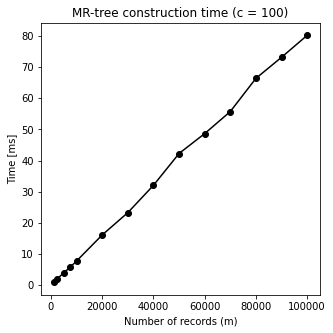

In [46]:
# Generate a plot.
plt.figure(figsize=(5, 5))
plt.title("MR-tree construction time (c = 100)")
plt.plot(df1['m'], df1['time'], marker='o', color='black')
plt.ylabel("Time [ms]")
plt.xlabel("Number of records (m)")
plt.savefig("{}/test_construction/test-construction.eps".format(base_dir), format='eps', bbox_inches='tight')

# Construction test 2

We fix the number of records $m$ and change the capacity $c$.

In [19]:
m = 10000
ntrials = 20
output_file2 = '{}/test_construction/test_construction_capacity.csv'.format(base_dir)
capacities = [5, 10, 25, 50, 75] + [100*i for i in range(1, 10+1)] + [2000, 5000]
print(capacities)

[5, 10, 25, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 5000]


In [20]:
# Test the implementation.

f = open(output_file2, 'w')
f.write('c,leaves,height,avg_time\n')

os.chdir(exec_dir)

for c in capacities:
    print('Testing c={}...'.format(c))
    input_file = '{}/test_construction/crash_data_{}.csv'.format(base_dir, m)
    print('Input file: ' + input_file)
    avg_time, height, leaves = 0, 0, 0
    for i in range(0, ntrials):
        p = subprocess.run(['./TestIndex', input_file, str(c)], capture_output=True, check=True)
        lines = p.stdout.decode('utf-8').splitlines()
        leaves += int((lines[3].split(':'))[1])
        height += int((lines[4].split(':'))[1])
        avg_time += int((lines[5].split(':'))[1])
    leaves /= ntrials
    height /= ntrials
    avg_time /= ntrials
    f.write('{},{},{},{}\n'.format(c, leaves, height, avg_time))

f.close()

os.chdir(base_dir)
print('Done!')

Testing c=5...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
Testing c=10...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
Testing c=25...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
Testing c=50...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
Testing c=75...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
Testing c=100...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
Testing c=200...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
Testing c=300...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
Testing c=400...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
Testing c=500...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_10000.csv
Testing c=600...
Input file: /Users/matteo/CSQV/test/test_construction/crash_data_1000

In [21]:
# Print the results.
df2 = pd.read_csv(output_file2)
# Convert returned and matching columns to integer type.
df2 = df2.astype({'leaves': int, 'height': int})
# Divide by 1000 to convert microseconds to milliseconds.
df2['avg_time'] /= 1000
# Round the execution times to 3 decimal places.
df = df2.round({'avg_time': 3})
print(df2.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
   c &  leaves &  height &  avg\_time \\
\midrule
   5 &    2000 &       5 &    14.618 \\
  10 &    1000 &       3 &    10.874 \\
  25 &     400 &       2 &     8.713 \\
  50 &     200 &       2 &     7.778 \\
  75 &     134 &       2 &     7.627 \\
 100 &     100 &       1 &     7.615 \\
 200 &      50 &       1 &     7.415 \\
 300 &      34 &       1 &     8.776 \\
 400 &      25 &       1 &     8.421 \\
 500 &      20 &       1 &     8.745 \\
 600 &      17 &       1 &     8.751 \\
 700 &      15 &       1 &     8.239 \\
 800 &      13 &       1 &     8.206 \\
 900 &      12 &       1 &     8.105 \\
1000 &      10 &       1 &     8.113 \\
2000 &       5 &       1 &     8.108 \\
5000 &       2 &       1 &     7.879 \\
\bottomrule
\end{tabular}



In [18]:
np.mean(df2['avg_time'])

8.040566666666665